## Lecture Notebook - Exploratory Data Analysis & Data Processing

Notebook with supplemental code for lectures on 
* [Data Processing](https://hiof.instructure.com/courses/8923/files/1592967?module_item_id=281460)
* [Exploratory Data Analaysis](https://hiof.instructure.com/courses/8923/files/1599797?module_item_id=281461)

In [74]:
# Notebook with supplemental code for lecture on data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTENC

In [75]:
# Make pandas show all columns
pd.set_option('display.max_columns', None)

### Census Income (Adult) Dataset

In [76]:
# Read the censur income dataset (adult), set the correct column names, and show first 5 rows
dataset_census_income = pd.read_csv('../data/census_income/adult.data', header=None)
column_names = [
    'age', 
    'workclass', 
    'fnlwgt', 
    'education', 
    'education-num',
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'sex', 
    'capital-gain', 
    'capital-loss', 
    'hours-per-week', 
    'native-country', 
    'income']
dataset_census_income.columns = column_names
dataset_census_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
# Show the counts and type information for each column
dataset_census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There should, based on the documentation of the dataset, be missing values, but for some reason they 
don't show up. 

In [78]:
# Count the number of missing values in each column
dataset_census_income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Not showing up here either..

In [79]:
# Show the unique values in one of the columns that are supposed to contain missing values
dataset_census_income['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Missing values have been encoded with ?. This won't work as intended with pandas missing value functionality

In [80]:
# Replacing ? with nans to make pandas library work as intended

dataset_census_income['workclass'] = dataset_census_income['workclass'].replace(' ?', np.NaN)
dataset_census_income['occupation'] = dataset_census_income['occupation'].replace(' ?', np.NaN)
dataset_census_income['native-country'] = dataset_census_income['native-country'].replace(' ?', np.NaN)


### Missing values

The missing values in the census income dataset are all in categorical features.

In [81]:
# Show unique values of workclass
dataset_census_income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

There is no obvious choice for the missing values, so let us encode them as 'Unknown'

In [82]:
# Fill in the missing values in workclass with 'Unknown'
dataset_census_income['workclass'] = dataset_census_income['workclass'].fillna('Unknown')
dataset_census_income.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [83]:
# Fill with most common value, not necessarily a good idea
# dataset_census_income['workclass'] = dataset_census_income['workclass'].fillna(dataset_census_income['workclass'].value_counts()[0,0])

In [84]:
# Show unique values of occupation
dataset_census_income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

No obvious way to fill missing values. Fill with 'Unknown'

In [85]:
# Fill in the missing values in occupation with 'Unknown'
dataset_census_income['occupation'] = dataset_census_income['occupation'].fillna('Unknown')

In [86]:
# Show unique values of native-country
dataset_census_income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [87]:
# Fill in the missing values in native-country with 'Unknown'
dataset_census_income['native-country'] = dataset_census_income['native-country'].fillna('Unknown')

### Set appropriate types

In [88]:
# Change the type of the categorical features. This ensures that the columns are properly 
# handled by internal and auxilliary functionality e.g. SMOTE
categorical_features = [
    'workclass', 
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country']
dataset_census_income[categorical_features] = dataset_census_income[categorical_features].astype('category')
dataset_census_income['income'] = dataset_census_income['income'].astype('category')

### Class imbalance

<Axes: xlabel='income'>

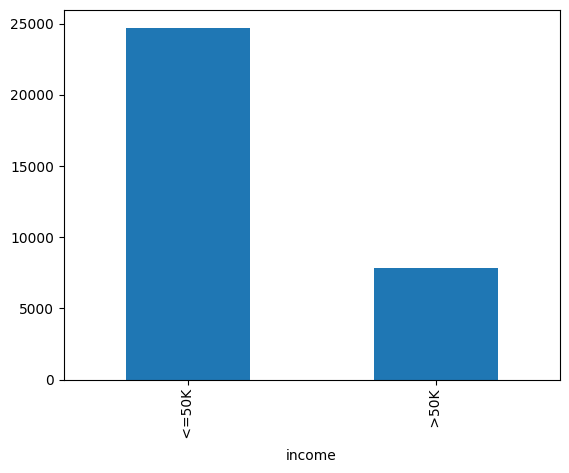

In [89]:
# Plot the distribution of our target column
dataset_census_income['income'].value_counts().plot.bar()

There is a clear class imbalance. Let us create two additional datasets, one where we under-sample the over-represented class, and one where we over-sample the under-represented class.

<Axes: xlabel='income'>

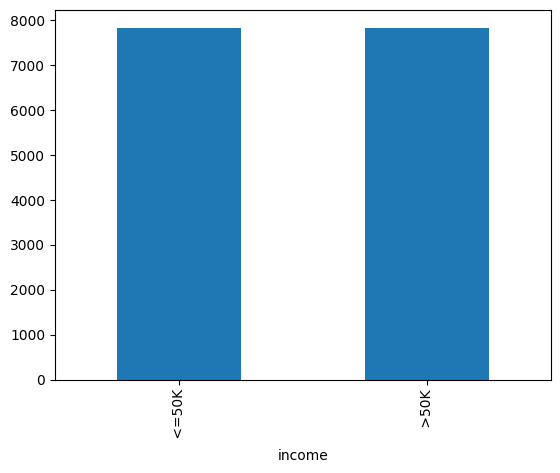

In [90]:
# Under-sampling

# Get all instances for the under-represented class

dataset_census_income_greater = dataset_census_income[dataset_census_income['income'] == ' >50K']

# Find the number of instances in the under-represented
num_instances, _ = dataset_census_income_greater.shape
dataset_census_income_less = dataset_census_income[dataset_census_income['income'] == ' <=50K'].sample(num_instances)

# Concat the two frames together
dataset_census_income_undersampled = pd.concat([dataset_census_income_greater, dataset_census_income_less])

# Shuffle the instances. Not really necessary if we are continuing to split with stratified sampling
dataset_census_income_undersampled = dataset_census_income_undersampled.sample(frac=1)

# Show the distribution
# dataset_census_income_undersampled['income'].hist()
dataset_census_income_undersampled['income'].value_counts().plot.bar()

<Axes: xlabel='income'>

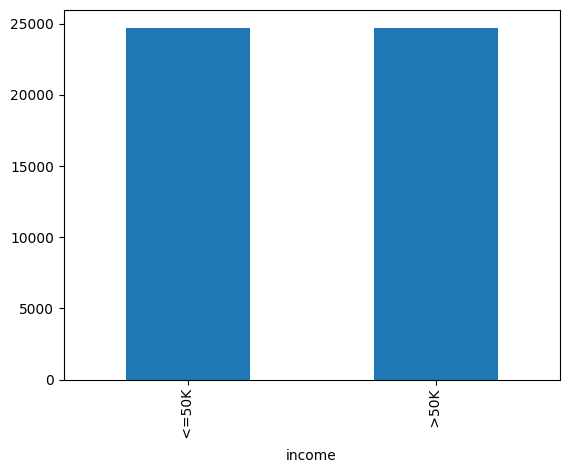

In [91]:
# Over-sampling using SMOTE

# We have a mixture of types (numerical and categorical) so we must use SMOTENC

# Over-sample by creating a SMOTENC instance set to use the pd.DataFrame dtypes for determining the categorical types and 
# invoce the fit_resample method. To avoid having to put the dataset back together, we send the entire dataset as X
dataset_census_income_oversampled, _ = SMOTENC('auto').fit_resample(dataset_census_income, dataset_census_income['income'])

# dataset_census_income_oversampled['income'].hist()
dataset_census_income_oversampled['income'].value_counts().plot.bar()


### Explore features 

In [92]:
# Separate features from targets
features_census_income = dataset_census_income.drop('income', axis=1)
# Store numerical features in separate frame
numerical_features_census_income = features_census_income.drop(categorical_features, axis=1)

# Show simple statistics for each numerical feature
numerical_features_census_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

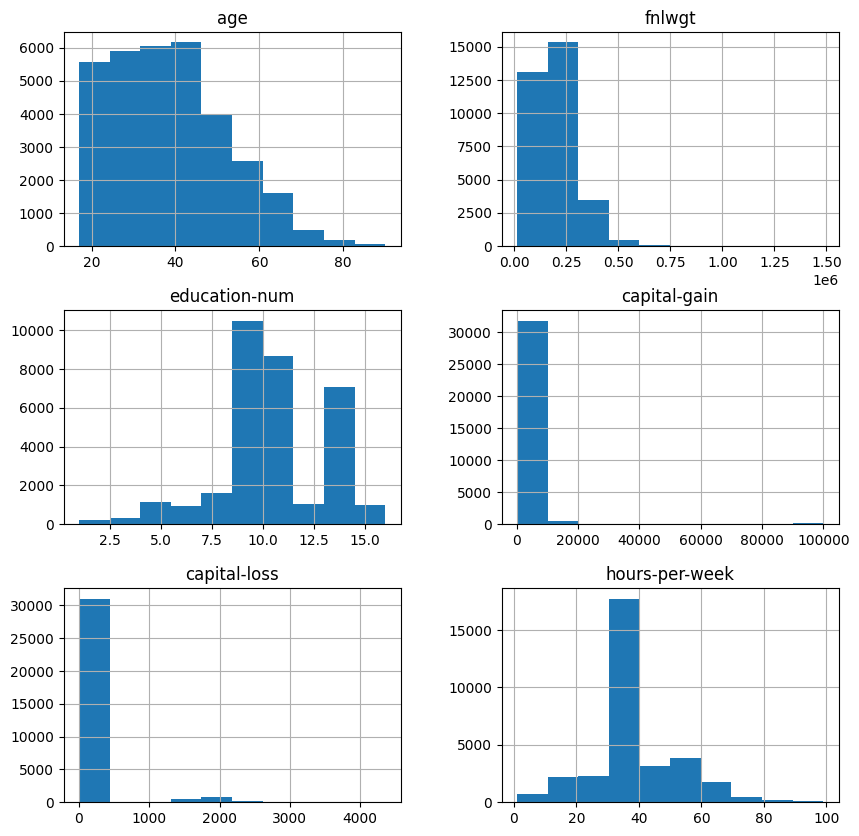

In [93]:
# Plot the distribution of the numerical features
numerical_features_census_income.hist(figsize=(10,10))

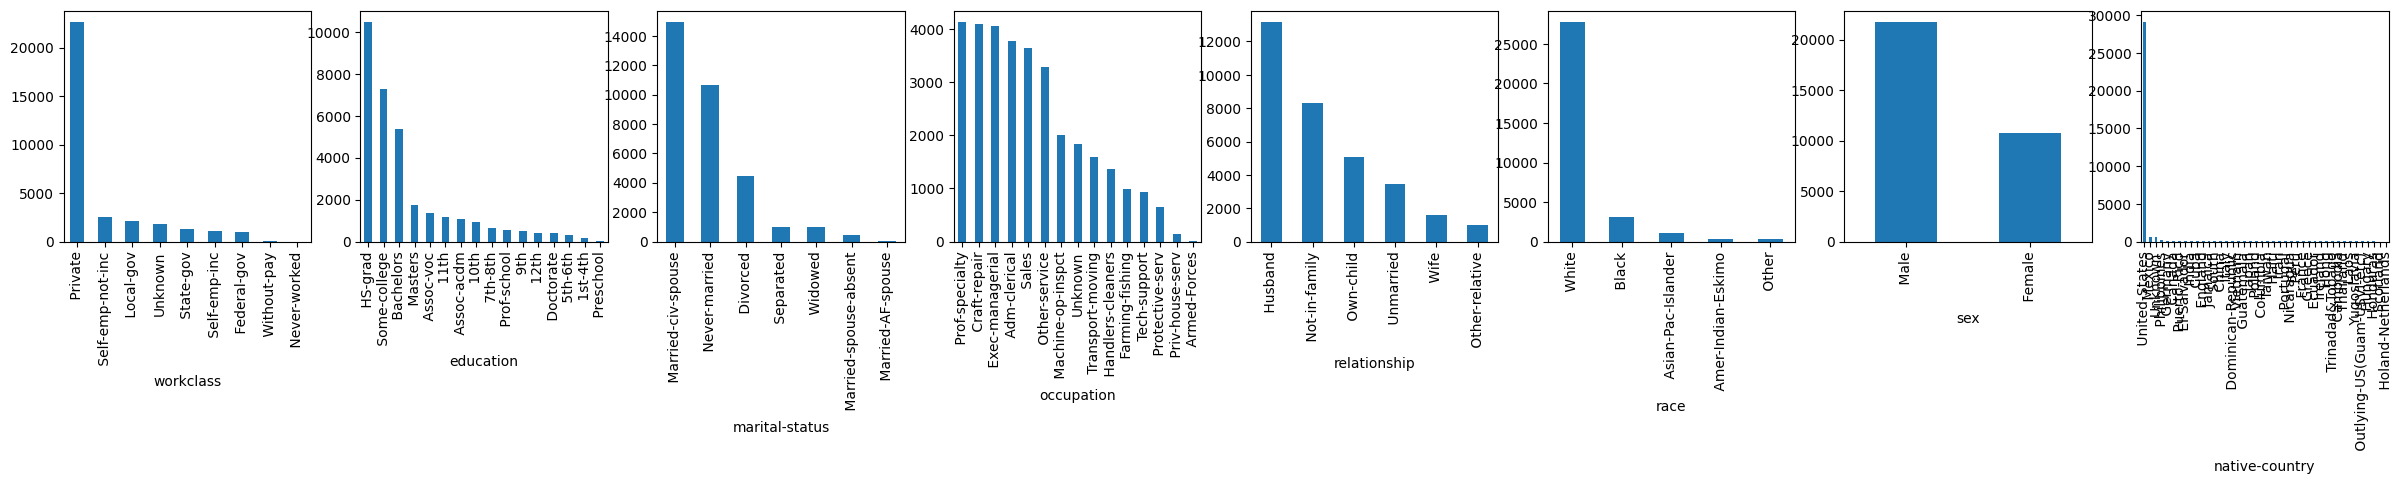

In [94]:
# Plot the distribution of all the categorical features
categorical_features_census_income = dataset_census_income[categorical_features]
fig, ax = plt.subplots(1,len(categorical_features), figsize=(30,3))
for i, feature in enumerate(categorical_features):
    categorical_features_census_income[feature].value_counts().plot.bar(ax=ax[i])

In [95]:
# Get the correlation between the numerical features
numerical_correlation = numerical_features_census_income.corr()
# Make the matrix have a colored background
numerical_correlation.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


No substantial correlation between numerical features

### Principal Component Analysis

In [96]:
# Perform PCA regardless of no correlation. This is just to show how PCA can be performed.
pca = PCA(4)
pca.fit(numerical_features_census_income)
reduced_numerical_features_census_income = pca.transform(numerical_features_census_income)
reduced_numerical_features_census_income.shape
# These reduced features should then replace the features in the original dataset

(32561, 4)

### Encoding Categorical Features


In [97]:
# Pandas can be used to create dummy encoding, but the default for get_dummies is to return 
# one-hot-encoding; we have to specify drop_first=True. 
# We remove the target to avoid encoding it, since the classifiers in scikit-learn expect unencoded labels 
features_census_income_dummy = pd.get_dummies(dataset_census_income.drop('income', axis=1),drop_first=True)
features_census_income_dummy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
0,39,77516,13,2174,0,40,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,

In [99]:
# Sklearn can one-hot encode
onehot =  OneHotEncoder()
features_census_income_onehot = onehot.fit_transform(categorical_features_census_income)
features_census_income_onehot


<32561x102 sparse matrix of type '<class 'numpy.float64'>'
	with 260488 stored elements in Compressed Sparse Row format>

### Normalizing Numerical Features

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

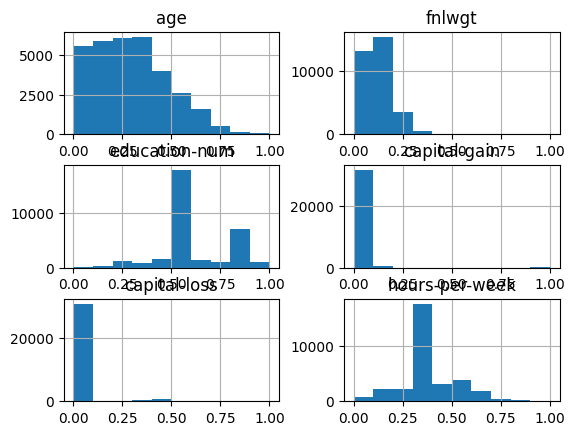

In [100]:
# Min-max normalization using Pandas
minmax_numerical_features_census_income = (numerical_features_census_income-numerical_features_census_income.min())/(numerical_features_census_income.max()-numerical_features_census_income.min())
minmax_numerical_features_census_income.hist()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

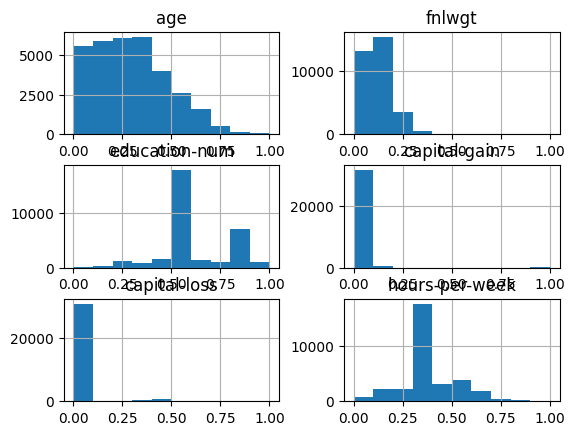

In [101]:
# Min-max using sklearn
minmax_numerical_features_census_income = pd.DataFrame(MinMaxScaler().fit_transform(numerical_features_census_income), columns=numerical_features_census_income.columns)
minmax_numerical_features_census_income.hist()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-4.844461e-17,-9.928962e-17,1.420605e-16,1.483889e-17,8.728758e-17,-2.836846e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-1.459182e-01,-2.166562e-01,-3.542890e-02
75%,6.904732e-01,4.478697e-01,7.460277e-01,-1.459182e-01,-2.166562e-01,3.695137e-01
max,3.769554e+00,1.226837e+01,2.300802e+00,1.339437e+01,1.059334e+01,4.742894e+00


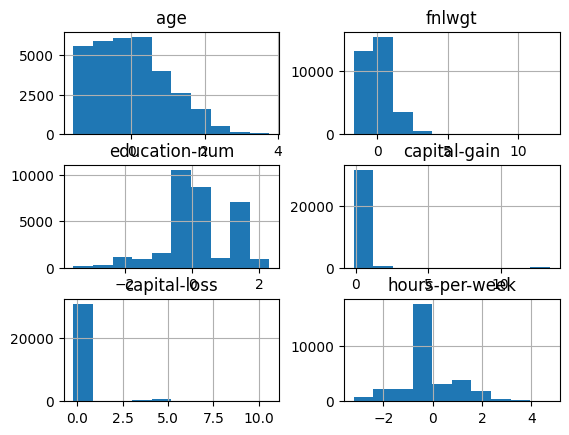

In [102]:
# Mean scaling using Pandas
mean_numerical_features_census_income = (numerical_features_census_income-numerical_features_census_income.mean())/(numerical_features_census_income.std())
mean_numerical_features_census_income.hist()
mean_numerical_features_census_income.describe()

In [103]:
# Mean normalization with sklearn
mean_numerical_features_census_income = pd.DataFrame(StandardScaler().fit_transform(numerical_features_census_income), columns=numerical_features_census_income.columns)
mean_numerical_features_census_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00
